![](https://media.makeameme.org/created/i-can-sell-596e8a.jpg)



# Weekly Project: Predicting Boston Housing prices

In this project, you will create, evaluate the performance and predictive power of your model on data collected from homes in suburbs of Boston, Massachusetts

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the **506 entries** represent aggregated data about **14 features** for homes from various suburbs in Boston, Massachusetts. 

**Data preprocessing has been applied to your dataset**. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

🎯 YOUR TASK: apply a machine learning model of your choice to **predict the price** of houses in a Boston neighborhood (which is column '**MEDV**')

The dataset can be accessed here: https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv


Here are the few steps you can follow

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
df.shape

(489, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


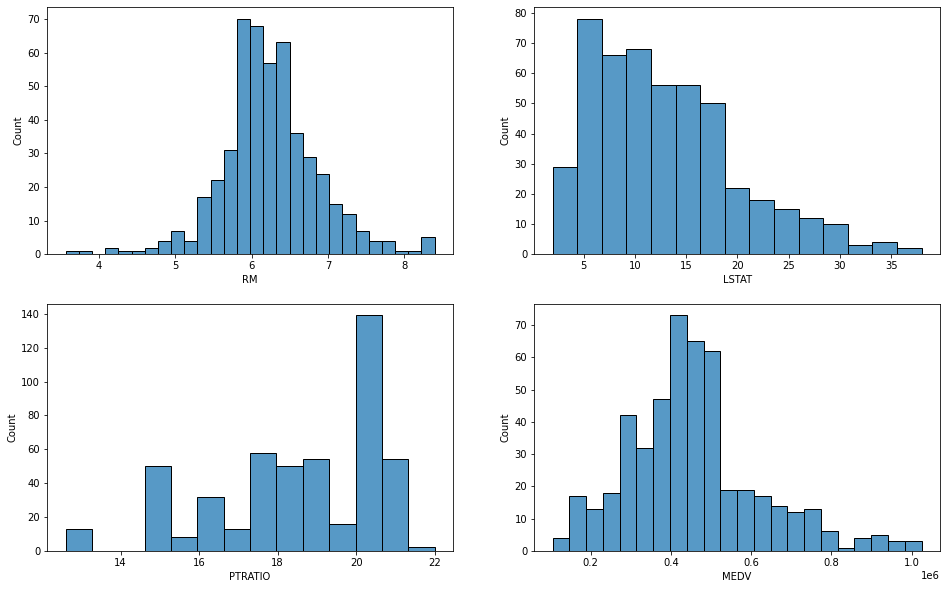

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.histplot(df, x='RM')
plt.subplot(222)
sns.histplot(df, x='LSTAT')
plt.subplot(223)
sns.histplot(df, x='PTRATIO')
plt.subplot(224)
sns.histplot(df, x='MEDV')



# **Step 1: Data Exploration (EDA)**

Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- '**RM**' is the **average number of rooms** among homes in the neighborhood.
- '**LSTAT**' is the **percentage** of homeowners in the neighborhood considered "**lower class**" (working poor).
- '**PTRATIO**' is the **ratio of students to teachers** in primary and secondary schools in the neighborhood.

**Question**: For each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each by plotting or calculating the correlation



In [ ]:
df.corr().style.background_gradient(cmap='PRGn')

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


# **Step 2: Get to know our performance Metric**

Do a quick read on Mean Absolute Error (MAE), because that is going to be the metric we are going to use for this task.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

**Question**: Calculate MAE on these data points by using the Sklearn library
```python
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
```
If a model is making these prediction (y_pred), is this a good model?

Chưa đủ để kết luận do data không đủ lớn

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]

In [ ]:
print(mean_absolute_error(y_true, y_pred))

0.5999999999999999


# **Step 3: Train our machine learning model**

Your task is to build a pipeline to preprocess this data and train a linear regression model to predict the house price. Make sure to follow all the recommended practices we mention in the class. 

Here are 2 pipelines you should implement:
- The **1st pipeline** include: MinMaxScaler (or Standard Scaler) as **Transformer** (to preprocess), and Linear Regression as **Estimator** (machine learning model)

- The **2nd pipeline** include: Polynomial Feature, **then** Standard Scaler as **Transformers**, and Linear Regression as **Estimator**. Pay attention that you have 2 transformers in a very specific order.






In [ ]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# Define your 1st pipeline here
pipe1 = Pipeline([('scaler',MinMaxScaler())]) 
estimator1 = LinearRegression()
final_pipe1 = Pipeline(steps=[
                       ('preprocessor', pipe1),
                       ('model',estimator1 )
                       ])

In [ ]:
# Define your 2nd pipeline here
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

pipe2 = Pipeline([
                  ('poly',PolynomialFeatures(degree = 1, include_bias=False)),
                  ('scaler',MinMaxScaler())]) 
estimator2 = LinearRegression()
final_pipe2 = Pipeline(steps=[
                       ('preprocessor', pipe2),
                       ('model',estimator2 )
                       ])



## 3.1 Use a simple train-test split

*Do these following step for the first pipeline only*:

- Use sklearn `train_test_split` to split data into train set and test set. Use random_state = 42
- Fit the pipeline on train set
- Use pipline to predict the test set
- Calculate the MAE on test set

In [ ]:
x = df.iloc[:,:3]
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=42)

In [ ]:
# Fit the pipeline on train set
final_pipe1.fit(x_train, y_train)

# Predict training data
y_train_pred1 = final_pipe1.predict(x_train)

# Predict test data
y_test_pred1 = final_pipe1.predict(x_test)


In [ ]:
from sklearn.metrics import mean_absolute_error
# MAE on train set
print(mean_absolute_error(y_train,y_train_pred1))

# MAE on test set
print(mean_absolute_error(y_test,y_test_pred1))

66173.47210488864
64277.288656703386


## 3.2a: Use 5 fold cross-validation *without* polynomial features

*Do these following steps for first pipeline*

You don't do a simple train-test split. Instead, you will **do train-test split 5 times** and then calculate the mean of the MAE score for these 5 test set.

Take a look at K-fold cross validation section in the sklearn tutorial or  [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and write a code to **calculate the mean of MAE of these 5-fold cross validation results**



*Hint*: You need to read the documentation to know exactly what will be returned when you use `cross_val_score(your_pipeline, X,y, scoring="neg_mean_absolute_error")`. And note that the only scoring that similar to MAE in `cross_val_score` is `neg_mean_absolute_error`, which means the result will be negative MAE. All you need to do is *multiply the result by -1* to turn them into positive MAE.

In [ ]:
kfold_shuffle = KFold(n_splits = 5,shuffle=True,random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(final_pipe1, x_train, y_train,cv=kfold_shuffle, scoring="neg_mean_absolute_error")*-1

array([73326.55575081, 73172.1230785 , 74196.63517307, 53185.24501428,
       60387.0105117 ])

In [ ]:
final_pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__memory', 'preprocessor__steps', 'preprocessor__verbose', 'preprocessor__poly', 'preprocessor__scaler', 'preprocessor__poly__degree', 'preprocessor__poly__include_bias', 'preprocessor__poly__interaction_only', 'preprocessor__poly__order', 'preprocessor__scaler__copy', 'preprocessor__scaler__feature_range', 'model__copy_X', 'model__fit_intercept', 'model__n_jobs', 'model__normalize'])

In [ ]:
param_grid = {'preprocessor__poly__degree': [1,2,3,4,5,6,7,8,9,10]}


In [ ]:
GSC = GridSearchCV(final_pipe2,
                   param_grid=param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=kfold_shuffle,
                   n_jobs=-1,
                   verbose=True)

## 3.2b: Use 5 fold cross-validation *with* polynomial features

*Do these following steps for first pipeline*

Repeat everything in **Part 2** on the second pipeline (The one with Polynomial Feature as one of the transformer). For this one, write a `for` loop to **test out different degrees** for Polynomial Feature. Here is roughly what your code should look like
```
for each value n in a range of your choice:
    - create a pipeline including Polynomial Feature(degree=n) => MinMaxScaler => Linear Regression
    - call cross_val_score on this pipeline
    - calculate mean of MAE scores from cross validation
```



In [ ]:
# YOUR CODE HERE
degree = [1,2,3,4,5,6,7,8,9,10]
for i in degree:
  pipe2 = Pipeline([
                  ('poly',PolynomialFeatures(degree = i, include_bias=False)),
                  ('scaler',MinMaxScaler())]) 
  estimator2 = LinearRegression()
  final_pipe2 = Pipeline(steps=[
                       ('preprocessor', pipe2),
                       ('model',estimator2 )
                       ])
  score = cross_val_score(final_pipe2, x_train, y_train,cv=kfold_shuffle, scoring="neg_mean_absolute_error")*-1
  print(f'cross value score of degree {i}: {score}')
  score_mean = score.mean()
  print(f'Mean of MAE degree {i}: {score_mean}')
  # X_train_poly = pipe2.fit_transform(x_train)
  # X_test_poly = pipe2.transform(x_test)
  # estimator2.fit(X_train_poly, y_train)
  # y_train_predict = estimator2.predict(X_train_poly)
  # print(f'MSE on train set with degree = {i}:  {mean_absolute_error(y_train, y_train_predict)}')
  # y_test_predict = estimator2.predict(X_test_poly)
  # print(f'MSE on validation set with degree = {i}: {mean_absolute_error(y_test, y_test_predict)}')

cross value score of degree 1: [73326.55575081 73172.1230785  74196.63517307 53185.24501428
 60387.0105117 ]
Mean of MAE degree 1: 66853.51390567118
cross value score of degree 2: [60604.69354457 53310.4686639  53556.40349191 47719.47307889
 51661.0629574 ]
Mean of MAE degree 2: 53370.42034733533
cross value score of degree 3: [61240.76353692 51339.12906    52401.15302157 47702.01517346
 50823.47421262]
Mean of MAE degree 3: 52701.30700091325
cross value score of degree 4: [60878.95919362 55867.50314746 49491.5197118  42309.2953763
 57874.0633819 ]
Mean of MAE degree 4: 53284.26816221579
cross value score of degree 5: [79478.41071466 58554.50311351 53757.55024054 55651.56696645
 58883.04483161]
Mean of MAE degree 5: 61265.0151733538
cross value score of degree 6: [178691.07807889 118636.35495968  78223.62824983  49494.02091383
 110500.62207202]
Mean of MAE degree 6: 107109.14085485107
cross value score of degree 7: [1203909.18196666  230964.63267478  252294.30019281  186370.7846977
  3

## 3.3c: Use GridSearchCV to find the best option

Now, let's upgrade the code using GridSearchCV. Please refer to the Sklearn tutorial and [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for details


In [ ]:
final_pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__memory', 'preprocessor__steps', 'preprocessor__verbose', 'preprocessor__poly', 'preprocessor__scaler', 'preprocessor__poly__degree', 'preprocessor__poly__include_bias', 'preprocessor__poly__interaction_only', 'preprocessor__poly__order', 'preprocessor__scaler__copy', 'preprocessor__scaler__feature_range', 'model__copy_X', 'model__fit_intercept', 'model__n_jobs', 'model__normalize'])

In [ ]:
param_grid = {'preprocessor__poly__degree': [1,2,3,4,5,6,7,8,9,10]}


In [ ]:
GSC = GridSearchCV(final_pipe2,
                   param_grid=param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=kfold_shuffle,
                   n_jobs=-1,
                   verbose=True)

In [ ]:
GSC.fit(x_train,y_train)
GSC.cv_results_
finaldata = pd.DataFrame(GSC.cv_results_)
finaldata

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005080,0.001421,0.002244,0.001393,1,{'preprocessor__poly__degree': 1},-7.332656e+04,-7.317212e+04,-7.419664e+04,-5.318525e+04,-6.038701e+04,-6.685351e+04,8.536788e+03,5
1,0.006362,0.001616,0.001636,0.000127,2,{'preprocessor__poly__degree': 2},-6.060469e+04,-5.331047e+04,-5.355640e+04,-4.771947e+04,-5.166106e+04,-5.337042e+04,4.176793e+03,3
2,0.007712,0.003061,0.002672,0.001828,3,{'preprocessor__poly__degree': 3},-6.124076e+04,-5.133913e+04,-5.240115e+04,-4.770202e+04,-5.082347e+04,-5.270131e+04,4.547243e+03,1
3,0.007058,0.002882,0.003553,0.002700,4,{'preprocessor__poly__degree': 4},-6.087896e+04,-5.586750e+04,-4.949152e+04,-4.230930e+04,-5.787406e+04,-5.328427e+04,6.637072e+03,2
4,0.010134,0.003546,0.001980,0.000143,5,{'preprocessor__poly__degree': 5},-7.947841e+04,-5.855450e+04,-5.375755e+04,-5.565157e+04,-5.888304e+04,-6.126502e+04,9.301841e+03,4
5,0.009630,0.001163,0.002035,0.000153,6,{'preprocessor__poly__degree': 6},-1.786911e+05,-1.186364e+05,-7.822363e+04,-4.949402e+04,-1.105006e+05,-1.071091e+05,4.341020e+04,6
6,0.015463,0.007241,0.002153,0.000193,7,{'preprocessor__poly__degree': 7},-1.203909e+06,-2.309646e+05,-2.522943e+05,-1.863708e+05,-3.785799e+05,-4.504238e+05,3.821108e+05,7
7,0.016052,0.000258,0.002447,0.000184,8,{'preprocessor__poly__degree': 8},-2.305029e+07,-7.783465e+05,-2.180288e+06,-2.842835e+06,-1.823482e+06,-6.135048e+06,8.483962e+06,8
8,0.022990,0.002354,0.002687,0.000210,9,{'preprocessor__poly__degree': 9},-2.472268e+08,-5.082031e+07,-3.520848e+07,-3.371791e+07,-3.267225e+07,-7.992914e+07,8.391001e+07,9
9,0.028759,0.005100,0.003042,0.000498,10,{'preprocessor__poly__degree': 10},-3.273223e+09,-4.877480e+08,-4.577175e+08,-2.858446e+08,-1.530588e+09,-1.207024e+09,1.122609e+09,10


In [ ]:
#Get back the best_estimator
best_estimator = GSC.best_estimator_
best_estimator

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('poly',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1)))],
                          verbose=False)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
best_estimator.fit(x_train,y_train)
# Predict training data
y_train_pred2 = best_estimator.predict(x_train)

# Predict test data
y_test_pred2 = best_estimator.predict(x_test)

In [ ]:
# MAE on train set
print(mean_absolute_error(y_train,y_train_pred2))

# MAE on test set
print(mean_absolute_error(y_test,y_test_pred2))

49728.14156255551
48324.77705979921


# **Step 4: Report your MAE**

From your results above, which pipeline configuration ends up with the lowest mean MAE from cross validation? And what is that MAE?

Pipeline với Polynomial Feature, degree = 3 cho ra mean MAE thấp nhất. MAE trên tập test là 48324.78 

# **Step 5: Make predictions**

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	|Client 2	|Client 3|
|-----------|-----------|-----------|--------|
|Total number of rooms in home	|5 rooms	|4 rooms	|8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|

Based on your model, what price would you recommend each client sell his/her home at?


Note that at this point, you haven't had a trained model to make the prediction on this data. So we will create a pipeline and train it.

To do this question, you need to
- Redefine the best pipeline that you report in step 4
- **Fit** this pipeline on the entire dataset given at the beginning (we don't need to do train/test split here as we already know this is our best pipeline)
- Manually create a new test data including 3 clients from the table above
- Use the pipeline you have fitted to **predict** this new test data
- Save the prediction to a variable called `client_preds`

In [ ]:
house = pd.DataFrame({'Client':[1,2,3],'RM':[5, 4, 8], 'LSTAT': [17, 32, 3], 'PTRATIO': [15,22,12]})
house

,Client,RM,LSTAT,PTRATIO
0,1,5,17,15
1,2,4,32,22
2,3,8,3,12


In [ ]:
x_house = house.iloc[:,1:]
x_house

,RM,LSTAT,PTRATIO
0,5,17,15
1,4,32,22
2,8,3,12


In [ ]:
pipe2 = Pipeline([
                  ('poly',PolynomialFeatures(degree = 3, include_bias=False)),
                  ('scaler',MinMaxScaler())]) 
estimator2 = LinearRegression()
final_pipe2 = Pipeline(steps=[
                       ('preprocessor', pipe2),
                       ('model',estimator2 )
                       ])
X_train_poly = pipe2.fit_transform(x_train)
x_house_poly = pipe2.transform(x_house)
estimator2.fit(X_train_poly, y_train)
y_house_predict = estimator2.predict(x_house_poly)
print(f'predict house: {y_house_predict}')

predict house: [ 336512.86711234  158921.77717016 1073860.92303722]


In [ ]:
client_preds = y_house_predict

After you have your variable `client_preds`, run this code to visualize your predictions against the home prices (MEDV)

```python
import matplotlib.pyplot as plt
for i,price in enumerate(client_preds):
    plt.hist(y, bins = 30,color='r',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)
```

Note that 
- `client_preds` should be a vector of size 3 (since we only have 3 records in the new test set) 
- `y` should be the column MEDV in the dataset you use to train

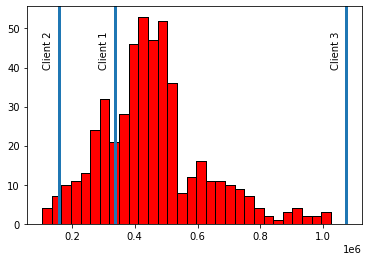

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
for i,price in enumerate(client_preds):
    plt.hist(y, bins = 30,color='r',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)


Do these prices seem reasonable given the values for the respective features?


1. Khá hợp lý vì:
- Client 3: số phòng cao nhất, tỉ lệ nghèo và tỉ số HS/GV thấp nên có giá lớn nhất
- Client 2: Số phòng đứng thứ 2 nhưng tỉ lệ ngèo và tỉ số HS/GV rất lớn nên giá thấp nhất
- Client 1: Số phòng lớn nhất nhưng tỉ tỉ lệ nghèo và tỉ số HS/GV cao nên giá nhà chỉ đứng 2
2. Tuy nhiên giá của Client 3 đã thuộc phần outlier trên so với phân bố giá của các căn hộ đã thu thập. 

# **Step 6: Applicability**

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

1. How relevant today is data that was collected from 1978? How important is inflation?
  - Answer: Từ 1978 đến nay có rất nhiều thay đổi như lạm phát, các tiêu chí để định đạt giá nhà cũng thay đổi... nên giá dự đoán sẽ sai lệch đi rất nhiều nếu áp dụng cho hiện tại. Lạm phát sẽ ảnh hưởng đến giá cả chung của các hàng hóa tăng lên theo thời gian, do đó những dự đoán giá cả trong tương lai xa sẽ không còn chính xác nếu model training với các label là của hiện tại. Nên đưa yếu tố này vào khi dự đoán giá trong tương lai xa 
2. Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
  - Answer:Những feature trên cũng tương quan với mức giá nhà nhưng không đủ để quyết định giá 1 ngôi nhà. Các yếu tố như chất lượng của các thiết bị trong nhà, diện tích lô đất, có hồ bơi hay không, v.v. là những yếu tố thiết yếu quyết định rất lớn đến giá cả ngôi nhà và cần đưa vào model để dự đoán của mình xác với thực tế hơn
3. Is the model robust enough to make consistent predictions?
Would data collected in an urban city like Boston be applicable in a rural city?
  - Answer:Không đủ mạnh để dự đoán, bằng chứng là MAE rất cao (MAE thấp nhất bằng khoảng 10% giá trung bình 1 ngôi nhà), bởi vì có rất nhiều yếu tố quyết định đến giá 1 ngôi nhà mà các yếu tố đưa vào model là quá ít và không đủ sức mạnh để dự đoán. Không thể áp dụng cho các vùng nông thôn, giả sử mô hình dự đoán tốt thì cũng chỉ có thể áp dụng trên những vùng tương tự như Boston
4. Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?
  - Answer:Không, vì mỗi ngôi nhà có 1 đặc tính khác nhau như diện tích, thiết bị trong nhà... dẫn đến chênh lệch mức giá giữa các ngôi nhà trong cùng khu vực. 